In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Reading the data from an csv file and make the copy of it and showingh the first 5 rows

In [22]:
reading_data = pd.read_csv("C:/Users/XBOX2/Desktop/project machine learning/My-First-ML-Project/Car Selling Price.csv")

In [23]:
df = reading_data.copy()
df.head()

,Brand,Year,Fuel,Transmission,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Owner,Seller_Type,Selling_Price
0,Maruti Swift Dzire VDI,2014,Diesel,Manual,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4 kmpl,145500,First Owner,Individual,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,Manual,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14 kmpl,120000,Second Owner,Individual,370000
2,Honda City 2017-2020 EXi,2006,Petrol,Manual,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7 kmpl,140000,Third Owner,Individual,158000
3,Hyundai i20 Sportz Diesel,2010,Diesel,Manual,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0 kmpl,127000,First Owner,Individual,225000
4,Maruti Swift VXI BSIII,2007,Petrol,Manual,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1 kmpl,120000,First Owner,Individual,130000


cleaning data

In [24]:
df.duplicated().sum()

np.int64(1202)

In [25]:
df = df.drop_duplicates()

In [26]:
df.shape

(6926, 13)

In [27]:
df.isna().sum()

Brand              0
Year               0
Fuel               0
Transmission       0
Engine           208
Max_Power        205
Torque           209
Seats            208
Mileage          208
KM_Driven          0
Owner              0
Seller_Type        0
Selling_Price      0
dtype: int64

In [28]:
df = df.dropna()

In [29]:
df.shape

(6717, 13)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          6717 non-null   object 
 1   Year           6717 non-null   int64  
 2   Fuel           6717 non-null   object 
 3   Transmission   6717 non-null   object 
 4   Engine         6717 non-null   object 
 5   Max_Power      6717 non-null   object 
 6   Torque         6717 non-null   object 
 7   Seats          6717 non-null   float64
 8   Mileage        6717 non-null   object 
 9   KM_Driven      6717 non-null   int64  
 10  Owner          6717 non-null   object 
 11  Seller_Type    6717 non-null   object 
 12  Selling_Price  6717 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


<Axes: xlabel='Selling_Price'>

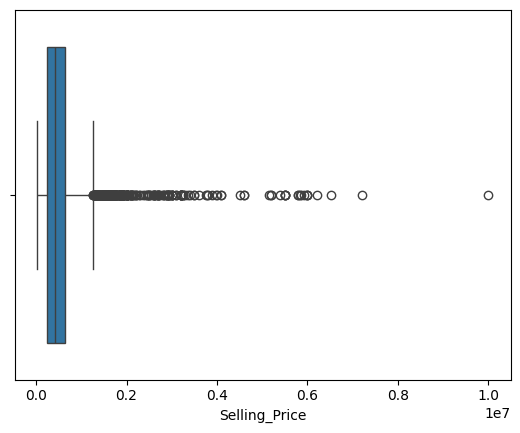

In [31]:
# outlier detection for selling price
sns.boxplot(x = df['Selling_Price'])

In [32]:
df_1 = df.copy()

we have a three columns that we want to extract the int number from it

In [33]:
df_1['Engine'] = df['Engine'].str.extract('(\d+)').astype('Int64')
df_1['Mileage'] = df['Mileage'].str.extract('(\d+)').astype('Int64')
df_1['Max_Power'] = df['Max_Power'].str.extract('(\d+)').astype('Int64')
df_1['Torque'] = df['Torque'].str.extract('(\d+)').astype('Int64')


df_1.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\XBOX2\AppData\Local\Temp\ipykernel_11216\2747211242.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_1['Engine'] = df['Engine'].str.extract('(\d+)').astype('Int64')
C:\Users\XBOX2\AppData\Local\Temp\ipykernel_11216\2747211242.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_1['Mileage'] = df['Mileage'].str.extract('(\d+)').astype('Int64')
C:\Users\XBOX2\AppData\Local\Temp\ipykernel_11216\2747211242.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_1['Max_Power'] = df['Max_Power'].str.extract('(\d+)').astype('Int64')
C:\Users\XBOX2\AppData\Local\Temp\ipykernel_11216\27

,Brand,Year,Fuel,Transmission,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Owner,Seller_Type,Selling_Price
0,Maruti Swift Dzire VDI,2014,Diesel,Manual,1248,74,190,5.0,23,145500,First Owner,Individual,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,Manual,1498,103,250,5.0,21,120000,Second Owner,Individual,370000
2,Honda City 2017-2020 EXi,2006,Petrol,Manual,1497,78,12,5.0,17,140000,Third Owner,Individual,158000
3,Hyundai i20 Sportz Diesel,2010,Diesel,Manual,1396,90,22,5.0,23,127000,First Owner,Individual,225000
4,Maruti Swift VXI BSIII,2007,Petrol,Manual,1298,88,11,5.0,16,120000,First Owner,Individual,130000


In [34]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          6717 non-null   object 
 1   Year           6717 non-null   int64  
 2   Fuel           6717 non-null   object 
 3   Transmission   6717 non-null   object 
 4   Engine         6717 non-null   Int64  
 5   Max_Power      6717 non-null   Int64  
 6   Torque         6717 non-null   Int64  
 7   Seats          6717 non-null   float64
 8   Mileage        6717 non-null   Int64  
 9   KM_Driven      6717 non-null   int64  
 10  Owner          6717 non-null   object 
 11  Seller_Type    6717 non-null   object 
 12  Selling_Price  6717 non-null   int64  
dtypes: Int64(4), float64(1), int64(3), object(5)
memory usage: 760.9+ KB


here in engine column it transformed as int32

Data Preprocessing

In [35]:
numeric_columns = df_1.select_dtypes(include = ['int32','int64','float64']).columns
df_1_numeric = df_1[numeric_columns]

In [36]:
df_1_numeric.head()

,Year,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Selling_Price
0,2014,1248,74,190,5.0,23,145500,450000
1,2014,1498,103,250,5.0,21,120000,370000
2,2006,1497,78,12,5.0,17,140000,158000
3,2010,1396,90,22,5.0,23,127000,225000
4,2007,1298,88,11,5.0,16,120000,130000


<Axes: >

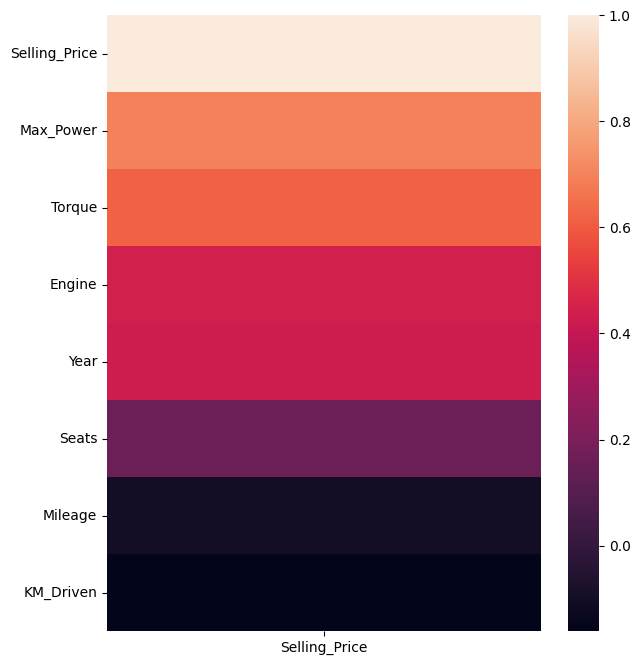

In [37]:
# correlation heat map of price
correlation_matrix = df_1_numeric.corr()
corr_price = correlation_matrix['Selling_Price'].sort_values(ascending = False)
corr_price = pd.DataFrame(corr_price)
plt.figure(figsize = (7,8))
sns.heatmap(corr_price)

We need to apply pie chart on the the type of Transmission

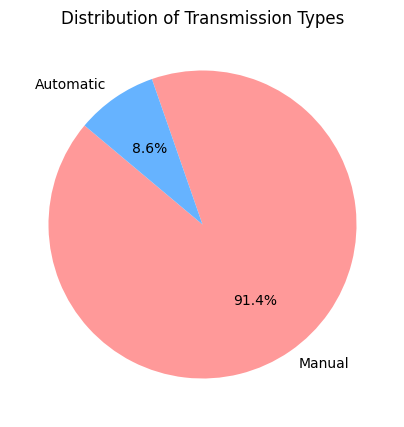

In [38]:
transmission_counts = df_1['Transmission'].value_counts()


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  


plt.figure(figsize=(5, 5))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Transmission Types')
plt.show()

we need to show the average price on each of year using scatter plot

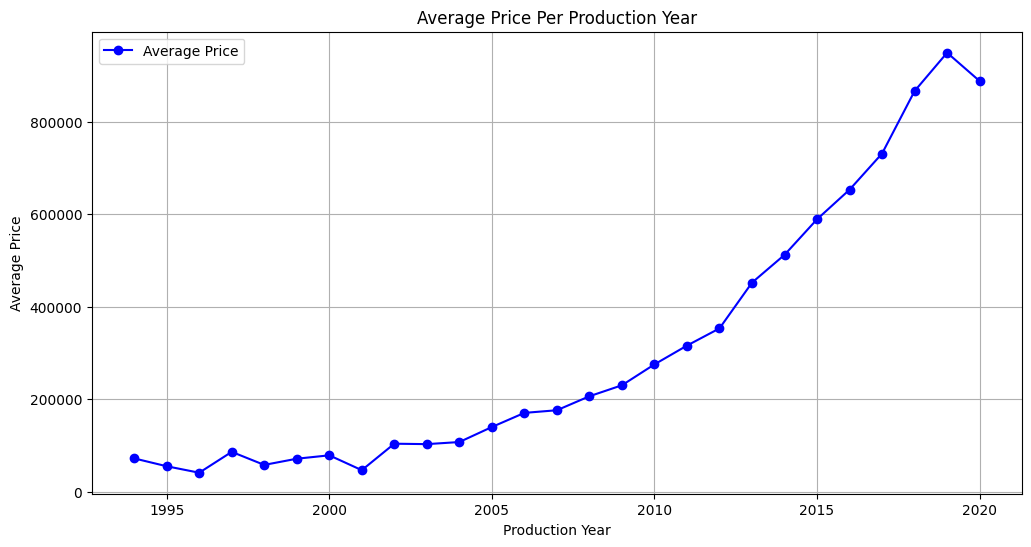

In [39]:
average_price_per_year = df_1.groupby('Year', as_index=False)['Selling_Price'].mean()


plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Selling_Price'], marker='o', color='blue', label='Average Price')


plt.xlabel('Production Year')
plt.ylabel('Average Price')
plt.title('Average Price Per Production Year')
plt.grid(True)
plt.legend()
plt.show()

In [40]:
df_1.columns

Index(['Brand', 'Year', 'Fuel', 'Transmission', 'Engine', 'Max_Power',
       'Torque', 'Seats', 'Mileage', 'KM_Driven', 'Owner', 'Seller_Type',
       'Selling_Price'],
      dtype='object')

Showing the most buying cars

C:\Users\XBOX2\AppData\Local\Temp\ipykernel_11216\3819442796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Brand',y = 'Selling_Price',data = Most_price_brand,palette='coolwarm')


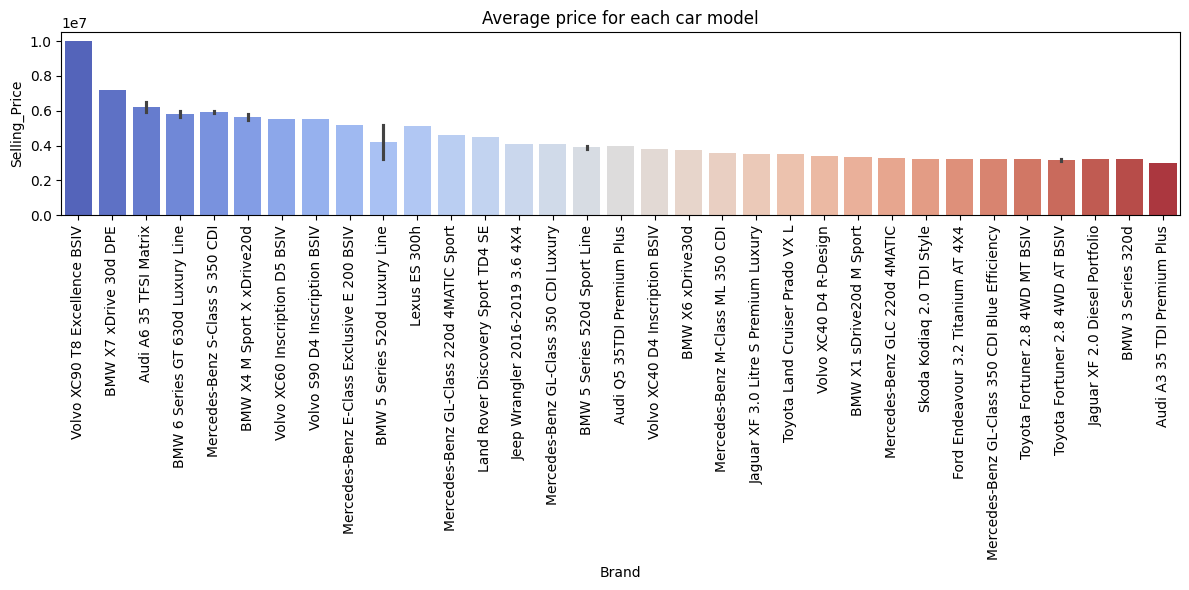

In [41]:
Most_price_brand = df_1.sort_values(by = 'Selling_Price', ascending=False).head(50)

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Brand',y = 'Selling_Price',data = Most_price_brand,palette='coolwarm')
plt.xticks(rotation = 90)
plt.title('Average price for each car model')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [42]:
df_1['Brand'].unique

<bound method Series.unique of 0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2                Honda City 2017-2020 EXi
3               Hyundai i20 Sportz Diesel
4                  Maruti Swift VXI BSIII
                      ...                
8121    Maruti Wagon R VXI BS IV with ABS
8122           Hyundai i20 Magna 1.4 CRDi
8123                    Hyundai i20 Magna
8124                Hyundai Verna CRDi SX
8125               Maruti Swift Dzire ZDi
Name: Brand, Length: 6717, dtype: object>

C:\Users\XBOX2\AppData\Local\Temp\ipykernel_11216\1689337340.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seller_Type', data=df_1, palette='Set1')


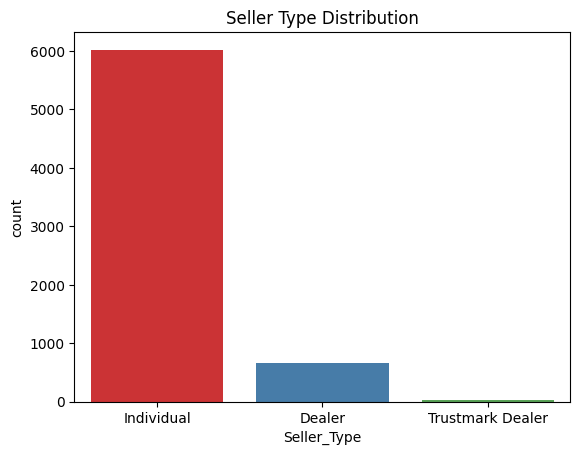

In [43]:
sns.countplot(x='Seller_Type', data=df_1, palette='Set1')
plt.title('Seller Type Distribution')  
plt.show()


In [44]:
print(df_1['Torque'].loc[10])

248


In [86]:
# simple linear regression
x = df_1[['Max_Power']]
y = df_1['Selling_Price']
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.3 , random_state = 42)
x_vald,x_test,y_vald,y_test = train_test_split(x_test,y_test,test_size = 0.5, random_state= 42)


In [87]:
# Print the number of samples in each dataset
print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_vald)}")
print(f"Test set size: {len(x_test)}")

Training set size: 4701
Validation set size: 1008
Test set size: 1008


In [88]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [89]:
y_vald_pred = model.predict(x_vald)
y_test_pred = model.predict(x_test)
# evalute the model
mse_vald = mean_squared_error(y_vald,y_vald_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
r2_score_vald = r2_score(y_vald,y_vald_pred)
r2_score_test = r2_score(y_test,y_test_pred)


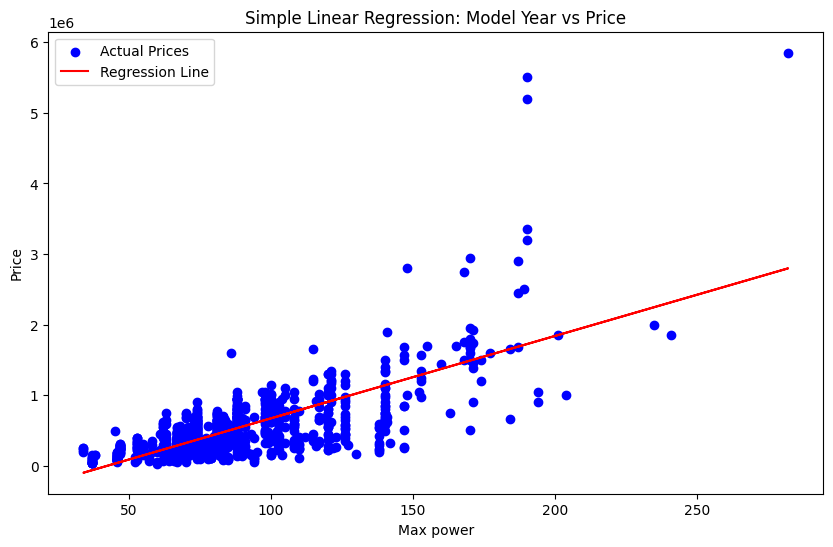

In [90]:
# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Prices')
plt.plot(x_test, y_test_pred, color='red', label='Regression Line')
plt.xlabel('Max power')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Model Year vs Price')
plt.legend()
plt.show()

In [50]:
# multiple linear regression
x_2 = df_1[['Max_Power','Torque','Engine','Year','Seats']]
y_2 = df_1['Selling_Price']
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x_2,y_2,test_size = 0.2 , random_state= 42)
x_vald_2,x_test_2,y_vald_2,y_test_2 = train_test_split(x_test_2,y_test_2,test_size = 0.5, random_state= 42)
# print the number of samples in each dataset 





In [51]:
model_2 = LinearRegression()
model_2.fit(x_train_2,y_train_2)


LinearRegression()

In [52]:
# evalute the model
y_vald_pred_2 = model_2.predict(x_vald_2)
y_test_pred_2 = model_2.predict(x_test_2)
mse_vald_2 = mean_squared_error(y_vald_2 , y_vald_pred_2)
mse_test_2 = mean_squared_error(y_test_2,y_test_pred_2)
r2_score_vald_2 = r2_score(y_vald_2,y_vald_pred_2)
r2_score_test_2 = r2_score(y_test_2,y_test_pred_2)


In [77]:
x_3 = df_1[['Max_Power']]
y_3 = df_1[['Selling_Price']]
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size = 0.3 , random_state= 42)
x_vald_3,x_test_3,y_vald_3,y_test_3 = train_test_split(x_test_3,y_test_3,test_size = 0.5, random_state= 42)



In [78]:
print(f"Number of training samples: {len(x_train_3)}")
print(f"Number of test samples: {len(x_test_3)}")
print(f"the number of validate set : {len(x_vald_3)}")

Number of training samples: 4701
Number of test samples: 1008
the number of validate set : 1008


In [79]:
# polynmial regression
pol = PolynomialFeatures(degree = 2)
x_train_3_poly = pol.fit_transform(x_train_3)


In [80]:
model_3 = LinearRegression()
model_3.fit(x_train_3_poly,y_train_3)


LinearRegression()

In [81]:
#evalute the model
y_vald_pred_3 = model_3.predict(pol.fit_transform(x_vald_3))
y_test_pred_3 = model_3.predict(pol.fit_transform(x_test_3))


In [83]:
mse_vald_3 = mean_squared_error(y_vald_3 , y_vald_pred_3)
mse_test_3 = mean_squared_error(y_test_3,y_test_pred_3)
r2_score_vald_3 = r2_score(y_vald_3,y_vald_pred_3)
r2_score_test_3 = r2_score(y_test_3,y_test_pred_3)


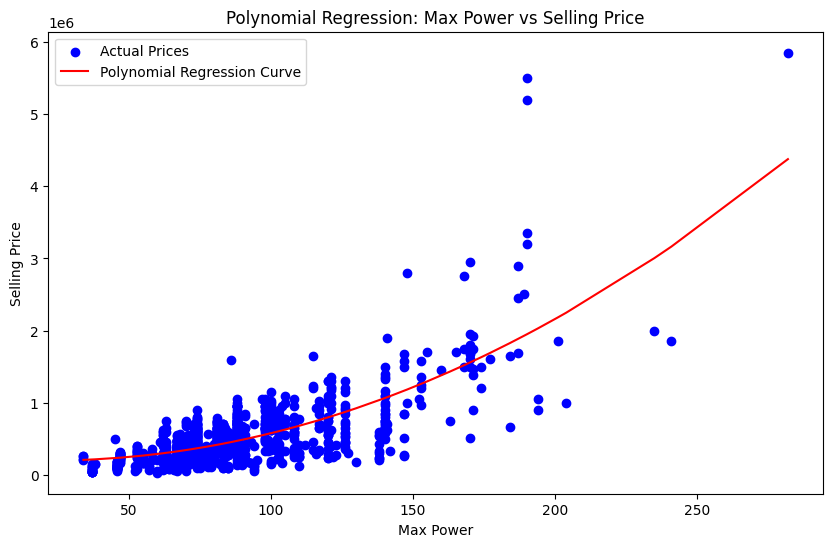

In [84]:
# Plot the polynomial regression results
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(x_test_3['Max_Power'], y_test_3, color='blue', label='Actual Prices')

# Generate predictions for the regression curve
x_test_3_poly = pol.fit_transform(x_test_3)
y_test_3_pred = model_3.predict(x_test_3_poly)

# Sort the data for a smooth curve
sorted_indices = x_test_3['Max_Power'].argsort()
x_sorted = x_test_3['Max_Power'].iloc[sorted_indices]
y_sorted = y_test_3_pred[sorted_indices]

# Plot the regression curve
plt.plot(x_sorted, y_sorted, color='red', label='Polynomial Regression Curve')

# Add labels and title
plt.xlabel('Max Power')
plt.ylabel('Selling Price')
plt.title('Polynomial Regression: Max Power vs Selling Price')
plt.legend()
plt.show()

compare the 3 models of linear regression 

In [91]:
print("\n model 1 (simple linear regression) Evaluation:")
print(f"Validation MSE: {mse_vald}")
print(f"Validation R2 Score: {r2_score_vald}")
print(f"Test MSE: {mse_test}")
print(f"Test R2 Score: {r2_score_test}")
print("_____________________________________________________________")
print("\n model 2 (multiple linear regression) Evaluation:")
print(f"Validation MSE: {mse_vald_2}")
print(f"Validation R2 Score: {r2_score_vald_2}")
print(f"test 2 MSE: {mse_test_2}")
print(f"test R2 score : {r2_score_test_2}")
print("_____________________________________________________________")
print("\n model 3 (polynomial regression) Evaluation :")
print(f"Validation MSE: {mse_vald_3}")
print(f"Validation R2 Score: {r2_score_vald_3}")
print(f"test 2 MSE: {mse_test_3}")
print(f"test R2 score : {r2_score_test_3}")

print("Don't forget to pray for your beloved Prophet Muhammad, may God bless him and grant him peace.")




 model 1 (simple linear regression) Evaluation:
Validation MSE: 129199928623.69978
Validation R2 Score: 0.48285982081116563
Test MSE: 114585613826.40092
Test R2 Score: 0.502667022091682
_____________________________________________________________

 model 2 (multiple linear regression) Evaluation:
Validation MSE: 83843300187.1093
Validation R2 Score: 0.6132520842343467
test 2 MSE: 74987122628.6212
test R2 score : 0.661153963362306
_____________________________________________________________

 model 3 (polynomial regression) Evaluation :
Validation MSE: 109930207557.99612
Validation R2 Score: 0.5599894842017759
test 2 MSE: 99816017824.65324
test R2 score : 0.5667711178569703
Don't forget to pray for your beloved Prophet Muhammad, may God bless him and grant him peace.
